<a href="https://colab.research.google.com/github/14vaishaligiri/atom/blob/master/Copy_of_AI%26ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#import the pandas libraries
#visualization of data libraeies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins

plt.rcParams['figure.figsize'] = 10,12

import warnings
warnings.filterwarnings('ignore')


#Analysing the present condition in India : How it started in India?
"The first **COVID-19** case was reported on 30th January 2020 when a student arrived **Kerala** from Wuhan. Just in next 2 days, Kerela reported 2 more cases. For almost a month, no new cases were reported in India, however, on 2nd March 2020, five new cases of corona virus were reported in Kerala again and since then the cases have been rising affecting **25** states, till now *(Bihar and Manipur being the most recent)*. Here is a brief timeline of the cases in India.
#Recent COVID-19 updates in India":
In India, from Jan 30 to 3:53pm CEST, 28 June 2020, there have been 528,859 confirmed cases of COVID-19 with 16,095 deaths.
Sikkim on Saturday reported its first +ve COVID-19 case\n",
        "- With over 6,500 fresh cases, the Covid in India rose to 1,25,101 on Saturday morning, with 3,720 fatalities\n",
        "- West Bengal asks Railways not to send migrant trains to State till May 26 in view of Cyclone Amphan\n",
        "- 196 new COVID 19 positive cases were reported in Karnataka on Saturday\n",
        "- Complete lockdown in Bengaluru on Sunday. \n",
        " - Bruhat Bengaluru Mahanagara Palike (BBMP) Commissioner B.H. Anil Kumar said the conditions and restrictions on Sunday will be similar to that under coronavirus lockdown 

#How is AI-ML useful in fighting the COVID-19 pandemic? 
1.Medical resource optimization
2.Ensuring demand planning stability
3.Contact tracing 
4.Situational awareness and critical response analysis

#1.1 Scraping the datasets from the [official Govt. website]
#(https://www.mohfw.gov.in)




In [11]:
#for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for getting web contents
import requests 
# for scraping web contents
from bs4 import BeautifulSoup


      



In [13]:
# get data
# link at which web data recides
link = 'https://www.mohfw.gov.in/'
# get web data
req = requests.get(link)
# parse web data
soup = BeautifulSoup(req.content,"html.parser")



In [14]:
# find the table
# our target table is the last table in the page
# get the table head
# table head may contain the column names, titles, subtitles
thead = soup.find_all('thead')[-1]
# print(thead)
# get all the rows in table head
# it usually have only one row, which has the column names
head = thead.find_all('tr')
# print(head)
# get the table tbody
# it contains the contents
tbody = soup.find_all('tbody')[-1]
# print(tbody)
# get all the rows in table body
# each row is each state's entry
body = tbody.find_all('tr')
# print(body)"

# get the table contents
# container for header rows / column title
head_rows = []
# container for table body / contents
body_rows = []
# loop through the head and append each row to head
for tr in head:
      td = tr.find_all(['th', 'td'])
      row = [i.text for i in td]
      head_rows.append(row)
# print(head_rows)
# loop through the body and append each row to body
for tr in body:
      td = tr.find_all(['th', 'td'])
      row = [i.text for i in td]
      body_rows.append(row)
# print(head_rows)

# save contents in a dataframe
# skip last 3 rows, it contains unwanted info
# head_rows contains column title
df_bs = pd.DataFrame(body_rows[:len(body_rows)-6],
columns=head_rows[0])         
# Drop 'S. No.' column
df_bs.drop('S. No.', axis=1, inplace=True)
# there are 36 states+UT in India
df_bs.head(36)


,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,31,45,0,76
1,Andhra Pradesh,7164,5908,169,13241
2,Arunachal Pradesh,121,60,1,182
3,Assam,2108,5088,10,7206
4,Bihar,2034,7118,60,9212
5,Chandigarh,87,336,6,429
6,Chhattisgarh,558,2091,13,2662
7,Dadra and Nagar Haveli and Daman and Diu,118,60,0,178
8,Delhi,27847,52607,2623,83077
9,Goa,717,478,3,1198


In [15]:
# date-time information
# =====================
#saving a copy of the dataframe
df_India = df_bs.copy()
# today's date
now  = datetime.now()
# format date to month-day-year
df_India['Date'] = now.strftime("%m/%d/%Y") 

# add 'Date' column to dataframe
df_India['Date'] = pd.to_datetime(df_India['Date'], format='%m/%d/%Y')

# df_India.head(36)



In [16]:
# remove extra characters from 'Name of State/UT' column
df_India['Name of State / UT'] = df_India['Name of State / UT'].str.replace('#', '')
df_India['Deaths**'] = df_India['Deaths**'].str.replace('#', '')

In [17]:
# latitude and longitude information
#latitude of the states
lat = {'Delhi':28.7041, 'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan':27.0238,
        'Telengana':18.1124, 'Uttar Pradesh':26.8467, 'Ladakh':34.2996, 'Tamil Nadu':11.1271,
        'Jammu and Kashmir':33.7782, 'Punjab':31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515,
        'Andhra Pradesh':15.9129, 'Odisha':20.9517, 'Uttarakhand':30.0668, 'West Bengal':22.9868, 
        'Puducherry': 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787, 'Gujarat': 22.2587, 
        'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 'Manipur':24.6637, 
        'Mizoram':23.1645, 'Goa': 15.2993, 'Andaman and Nicobar Islands': 11.7401, 'Assam' : 26.2006, 
        'Jharkhand': 23.6102, 'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408, 'Nagaland': 26.1584, 
        'Meghalaya' : 25.4670, 'Dadar Nagar Haveli' : 20.1809, 'Sikkim': 27.5330}
        
#longitude of the states
long = {'Delhi':77.1025, 'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan':74.2179,
        'Telengana':79.0193, 'Uttar Pradesh':80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab':75.3412, 'Karnataka':75.7139, 'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 'Odisha':85.0985, 'Uttarakhand':79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh':81.8661, 'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 'Manipur':93.9063, 
        'Mizoram':92.9376, 'Goa': 74.1240, 'Andaman and Nicobar Islands': 92.6586, 'Assam' : 92.9376, 
        'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882, 'Nagaland': 94.5624,
        'Meghalaya' : 91.3662, 'Dadar Nagar Haveli' : 73.0169, 'Sikkim': 88.5122}
        
# add latitude column based on 'Name of State / UT' column
df_India['Latitude'] = df_India['Name of State / UT'].map(lat)
# add longitude column based on 'Name of State / UT' column
df_India['Longitude'] = df_India['Name of State / UT'].map(long)
df_India.head(36)
    



,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,31,45,0,76,2020-06-29,11.7401,92.6586
1,Andhra Pradesh,7164,5908,169,13241,2020-06-29,15.9129,79.7400
2,Arunachal Pradesh,121,60,1,182,2020-06-29,28.2180,94.7278
3,Assam,2108,5088,10,7206,2020-06-29,26.2006,92.9376
4,Bihar,2034,7118,60,9212,2020-06-29,25.0961,85.3131
5,Chandigarh,87,336,6,429,2020-06-29,30.7333,76.7794
6,Chhattisgarh,558,2091,13,2662,2020-06-29,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,118,60,0,178,2020-06-29,NaN,NaN
8,Delhi,27847,52607,2623,83077,2020-06-29,28.7041,77.1025
9,Goa,717,478,3,1198,2020-06-29,15.2993,74.1240


In [18]:
# rename columns
df_India = df_India.rename(columns={'Cured/Discharged/Migrated' :'Cured/Discharged',
                                    'Total Confirmed cases *': 'Confirmed', 
                                    'Total Confirmed cases ': 'Confirmed',
                                    'Total Confirmed cases* ': 'Confirmed'})

df_India = df_India.rename(columns={'Cured/Discharged':'Cured'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})
df_India = df_India.rename(columns=lambda x: re.sub('Total Confirmed cases'  , 
                                                    'Total Confirmed cases',x))
df_India = df_India.rename(columns={'Deaths ( more than 70% cases due to comorbidities )':'Deaths','Deaths**':'Deaths'})

# unique state names
df_India['State/UnionTerritory'].unique()



array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand',
       'Uttar Pradesh', 'West Bengal'], dtype=object)

In [19]:
# number of missing values
df_India.isna().sum()


State/UnionTerritory          0
Active Cases*                 0
Cured/Discharged/Migrated*    0
Deaths                        0
Total Confirmed cases*        0
Date                          0
Latitude                      2
Longitude                     2
dtype: int64

In [20]:
# number of unique values 
df_India.nunique()


State/UnionTerritory          35
Active Cases*                 35
Cured/Discharged/Migrated*    34
Deaths                        26
Total Confirmed cases*        35
Date                           1
Latitude                      33
Longitude                     30
dtype: int64

In [29]:
df_India.head(36)

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,31,45,0,76,2020-06-29,11.7401,92.6586
1,Andhra Pradesh,7164,5908,169,13241,2020-06-29,15.9129,79.7400
2,Arunachal Pradesh,121,60,1,182,2020-06-29,28.2180,94.7278
3,Assam,2108,5088,10,7206,2020-06-29,26.2006,92.9376
4,Bihar,2034,7118,60,9212,2020-06-29,25.0961,85.3131
5,Chandigarh,87,336,6,429,2020-06-29,30.7333,76.7794
6,Chhattisgarh,558,2091,13,2662,2020-06-29,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,118,60,0,178,2020-06-29,NaN,NaN
8,Delhi,27847,52607,2623,83077,2020-06-29,28.7041,77.1025
9,Goa,717,478,3,1198,2020-06-29,15.2993,74.1240


In [30]:
# complete data info
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   State/UnionTerritory        35 non-null     object        
 1   Active Cases*               35 non-null     object        
 2   Cured/Discharged/Migrated*  35 non-null     object        
 3   Deaths                      35 non-null     object        
 4   Total Confirmed cases*      35 non-null     object        
 5   Date                        35 non-null     datetime64[ns]
 6   Latitude                    33 non-null     float64       
 7   Longitude                   33 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 2.3+ KB


In [32]:
# fix datatype
df_India['Date'] = pd.to_datetime(df_India['Date'])

In [34]:
# rename state/UT names
df_India['State/UnionTerritory'].replace('Chattisgarh', 'Chhattisgarh', inplace=True)
df_India['State/UnionTerritory'].replace('Pondicherry', 'Puducherry', inplace=True) 

In [35]:
df_India.head(36)

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,31,45,0,76,2020-06-29,11.7401,92.6586
1,Andhra Pradesh,7164,5908,169,13241,2020-06-29,15.9129,79.7400
2,Arunachal Pradesh,121,60,1,182,2020-06-29,28.2180,94.7278
3,Assam,2108,5088,10,7206,2020-06-29,26.2006,92.9376
4,Bihar,2034,7118,60,9212,2020-06-29,25.0961,85.3131
5,Chandigarh,87,336,6,429,2020-06-29,30.7333,76.7794
6,Chhattisgarh,558,2091,13,2662,2020-06-29,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,118,60,0,178,2020-06-29,NaN,NaN
8,Delhi,27847,52607,2623,83077,2020-06-29,28.7041,77.1025
9,Goa,717,478,3,1198,2020-06-29,15.2993,74.1240


In [38]:
#Learn how to read a .csv file by creating a dataframe using pandas
# Reading the datasets
df= pd.read_csv('/content/covid_19_india.csv')
df_india = df.copy()
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...
2163,2164,21/05/20,8:00 AM,Tripura,-,-,133.0,0.0,173
2164,2165,21/05/20,8:00 AM,Uttarakhand,-,-,53.0,1.0,122
2165,2166,21/05/20,8:00 AM,Uttar Pradesh,-,-,3066.0,127.0,5175
2166,2167,21/05/20,8:00 AM,West Bengal,-,-,1136.0,253.0,3103


In [39]:
#COVID19 Cases in India
total_cases = df['Confirmed'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (23rd May, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across India till date (23rd May, 2020): 1879005


In [ ]:
#Learn how to highlight your dataframe
df_temp = df.drop(['Latitude', 'Longitude', 'Date', 'index', 'level_0'], axis=1) 
#Removing Date, Latitude and Longitude and other extra columns
df_temp.style.background_gradient(cmap='Reds')

In [67]:
today = now.strftime("%Y_%m_%d")
total_cured = df['Cured'].sum()
print("Total people who were cured as of "+today+" are: ", total_cured)
total_cases = df['Confirmed'].sum()
print("Total people who were detected COVID+ve as of "+today+" are: ", total_cases)
total_death = df['Deaths'].sum()
print("Total people who died due to COVID19 as of "+today+" are: ",total_death)
total_active = total_cases-total_cured-total_death
print("Total active COVID19 cases as of "+today+" are: ",total_active)

Total people who were cured as of 2020_06_29 are:  564043.0
Total people who were detected COVID+ve as of 2020_06_29 are:  1879005
Total people who died due to COVID19 as of 2020_06_29 are:  60239.0
Total active COVID19 cases as of 2020_06_29 are:  1254723.0


In [ ]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Confirmed'] - (df['Deaths'] + df1['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('State/UnionTerritory')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')




In [70]:
import numpy as np
state_cases = df_india.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Cure Rate (per 100)"])

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
21,Maharashtra,39297,1390.000000,10318.000000,27589.000000,3.540000,26.260000
31,Tamil Nadu,13191,87.000000,5882.000000,7222.000000,0.660000,44.590000
11,Gujarat,12537,749.000000,5219.000000,6569.000000,5.970000,41.630000
9,Delhi,11088,176.000000,5192.000000,5720.000000,1.590000,46.830000
30,Rajasthan,6015,147.000000,3404.000000,2464.000000,2.440000,56.590000
20,Madhya Pradesh,5735,267.000000,2733.000000,2735.000000,4.660000,47.650000
35,Uttar Pradesh,5175,127.000000,3066.000000,1982.000000,2.450000,59.250000
37,West Bengal,3103,253.000000,1136.000000,1714.000000,8.150000,36.610000
1,Andhra Pradesh,2602,53.000000,1640.000000,909.000000,2.040000,63.030000
29,Punjab,2005,38.000000,1794.000000,173.000000,1.900000,89.480000


In [72]:
#Finding more detail COVID Insights in India
age_details = pd.read_csv('/content/AgeGroupDetails_i0e5l.csv')
india_covid_19 = pd.read_csv('/content/covid_19_india.csv')
hospital_beds = pd.read_csv('/content/HospitalBedsIndia.csv')
individual_details = pd.read_csv('/content/IndividualDetails.csv')
ICMR_details = pd.read_csv('/content/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('/content/ICMRTestingLabs.csv')
state_testing = pd.read_csv('/content/StatewiseTestingDetails.csv')
population = pd.read_csv('/content/population_india_census2011.csv')

In [76]:
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'],dayfirst = True)
state_testing['Date'] = pd.to_datetime(state_testing['Date'])
ICMR_details['DateTime'] = pd.to_datetime(ICMR_details['DateTime'],dayfirst = True)
ICMR_details = ICMR_details.dropna(subset=['TotalSamplesTested', 'TotalPositiveCases'])

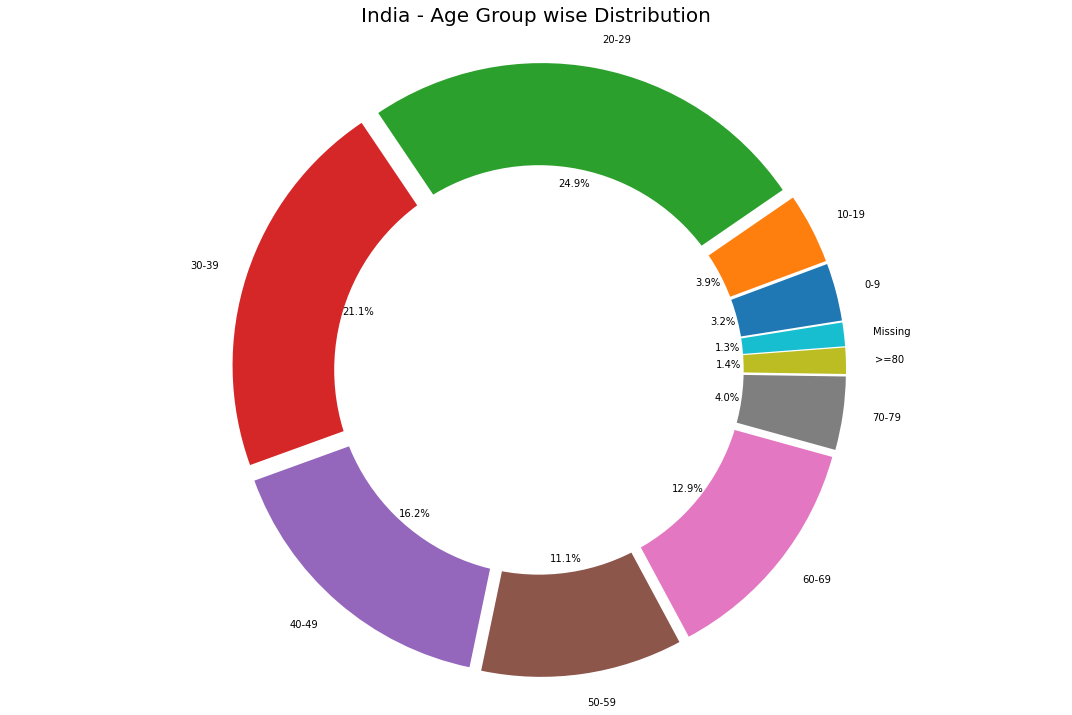

In [75]:
labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

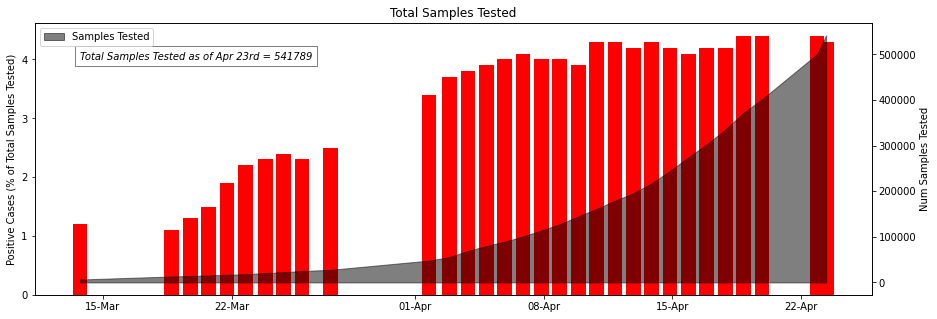

In [93]:
#Total Samples Tested
import matplotlib.dates as mdates
ICMR_details['Percent_positive'] = round((ICMR_details['TotalPositiveCases']/ICMR_details['TotalSamplesTested'])*100,1)

fig, ax1 = plt.subplots(figsize= (15,5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax1.set_ylabel('Positive Cases (% of Total Samples Tested)')
ax1.bar(ICMR_details['DateTime'] , ICMR_details['Percent_positive'], color="red",label = 'Percentage of Positive Cases')
ax1.text(ICMR_details['DateTime'][0],4, 'Total Samples Tested as of Apr 23rd = 541789', style='italic',fontsize= 10,
        bbox={'facecolor': 'white' ,'alpha': 0.5, 'pad': 5})

ax2 = ax1.twinx()  
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax2.set_ylabel('Num Samples Tested')
ax2.fill_between(ICMR_details['DateTime'],ICMR_details['TotalSamplesTested'],color = 'black',alpha = 0.5,label = 'Samples Tested');

plt.legend(loc="upper left")
plt.title('Total Samples Tested')
plt.show()

In [94]:
import json
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [95]:
# save data in a dataframe
tested = pd.DataFrame(parsed['states_tested_data'])

# first few rows
tested.tail()

,coronaenquirycalls,cumulativepeopleinquarantine,negative,numcallsstatehelpline,numicubeds,numisolationbeds,numventilators,peopleinicu,peopleonventilators,populationncp2019projection,positive,source1,source2,state,tagpeopleinquarantine,tagtotaltested,testpositivityrate,testspermillion,testsperpositivecase,testsperthousand,totaln95masks,totalpeoplecurrentlyinquarantine,totalpeoplereleasedfromquarantine,totalppe,totaltested,unconfirmed,updatedon,_d5fpr
2563,,,,,948,,395,,,96906000,15648,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.56%,4533,28,4.53,946040,7865,93180,1569262,439258,,25/06/2020,NaN
2564,,,,,948,,395,,,96906000,16190,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.61%,4631,28,4.63,956040,7330,93898,1582262,448795,,26/06/2020,NaN
2565,,,,,948,,395,,,96906000,16711,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.65%,4730,27,4.73,966040,7181,94993,1596262,458343,,27/06/2020,NaN
2566,,,,,948,,395,,,96906000,17283,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.69%,4839,27,4.84,976040,6937,95383,1606262,468906,,28/06/2020,NaN
2567,,,,,948,,395,,,96906000,17907,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.74%,4937,27,4.94,983040,6931,95944,1618262,478419,,29/06/2020,NaN


In [97]:
# fix datatype
tested['updatedon'] = pd.to_datetime(tested['updatedon'])

In [98]:
# save file as a scv file
tested.to_csv('updated_tests_latest_state_level.csv', index=False)

In [99]:
state_test_cases = tested.groupby(['updatedon','state'])['totaltested','populationncp2019projection','testpositivityrate',	'testsperpositivecase',	'testsperthousand','totalpeoplecurrentlyinquarantine'].max().reset_index()

In [100]:
state_test_cases.head(36)

,updatedon,state,totaltested,populationncp2019projection,testpositivityrate,testsperpositivecase,testsperthousand,totalpeoplecurrentlyinquarantine
0,2020-01-04,Delhi,2621,19814000,0.00%,,0.13,
1,2020-01-04,Kerala,7965,35125000,3.33%,30,0.23,622
2,2020-01-04,West Bengal,659,96906000,5.61%,18,0.01,
3,2020-01-05,Andaman and Nicobar Islands,3754,397000,0.88%,114,9.46,643
4,2020-01-05,Andhra Pradesh,102460,52221000,1.43%,70,1.96,
5,2020-01-05,Arunachal Pradesh,724,1504000,0.28%,362,0.48,
6,2020-01-05,Assam,,34293000,,,0.00,
7,2020-01-05,Bihar,24118,119520000,1.93%,52,0.20,2156
8,2020-01-05,Chandigarh,1252,1179000,7.03%,14,1.06,
9,2020-01-05,Chhattisgarh,18039,28724000,0.24%,420,0.63,575


In [101]:
state_test_cases = tested.groupby('state')['totaltested','populationncp2019projection','testpositivityrate',	'testsperpositivecase',	'testsperthousand','totalpeoplecurrentlyinquarantine'].max()
state_test_cases['testpositivityrate'] = state_test_cases['testpositivityrate'].str.replace('%', '')

In [102]:
state_test_cases = state_test_cases.apply(pd.to_numeric)

In [103]:
state_test_cases.nunique()

totaltested                         35
populationncp2019projection         34
testpositivityrate                  35
testsperpositivecase                23
testsperthousand                    33
totalpeoplecurrentlyinquarantine    26
dtype: int64

In [104]:
state_test_cases.sort_values('totaltested', ascending= False).style.background_gradient(cmap='Blues',subset=["totaltested"])\
                        .background_gradient(cmap='Blues',subset=["populationncp2019projection"])\
                        .background_gradient(cmap='Blues',subset=["testpositivityrate"])\
                        .background_gradient(cmap='Blues',subset=["testsperpositivecase"])\
                        .background_gradient(cmap='Blues',subset=["testsperthousand"])\
                        .background_gradient(cmap='Blues',subset=["totalpeoplecurrentlyinquarantine"])

,totaltested,populationncp2019projection,testpositivityrate,testsperpositivecase,testsperthousand,totalpeoplecurrentlyinquarantine
state,,,,,,
Haryana,99987,28672000,5.770000,87,7.920000,44759.000000
Jharkhand,99931,37403000,1.740000,99,3.560000,99641.000000
Kerala,99692,35125000,3.380000,83,5.800000,992.000000
Madhya Pradesh,99677,82232000,9.770000,26,4.000000,nan
Bihar,99108,119520000,5.180000,95,1.780000,802.000000
Chhattisgarh,98603,28724000,1.800000,95,4.660000,924.000000
Uttar Pradesh,98300,224979000,5.290000,41,2.680000,9911.000000
Karnataka,98081,65798000,2.790000,99,8.840000,42847.000000
Rajasthan,97790,77264000,2.880000,49,9.590000,nan


In [111]:
hospital_beds.head(36)

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
5,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778
6,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342
7,Dadra & Nagar Haveli,9,2,1.0,1,13,568,10,273,1,316
8,Daman & Diu,4,2,NaN,2,8,298,5,240,0,0
9,Delhi,534,25,9.0,47,615,20572,0,0,109,24383


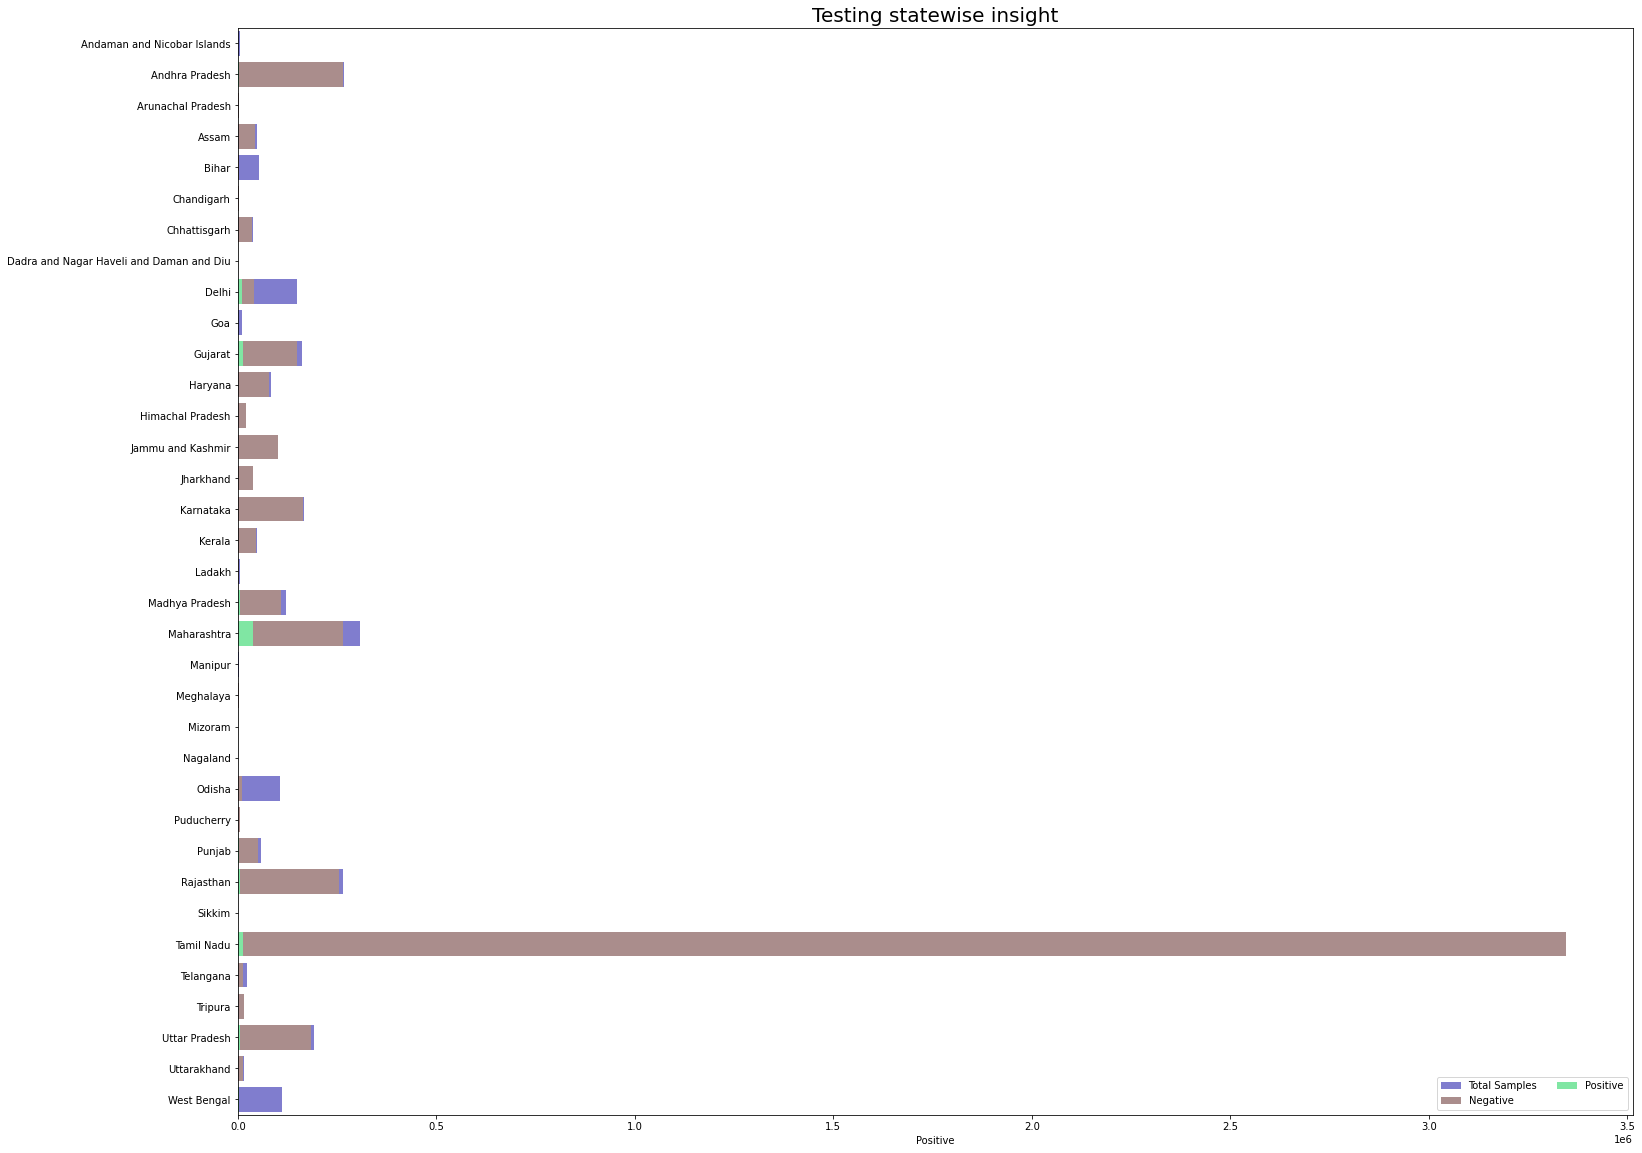

In [113]:
#Exploring Statewise Testing Insights
state_test = pd.pivot_table(state_testing, values=['TotalSamples','Negative','Positive'], index='State', aggfunc='max')
state_names = list(state_test.index)
state_test['State'] = state_names

plt.figure(figsize=(25,20))
sns.set_color_codes("pastel")
sns.barplot(x="TotalSamples", y= state_names, data=state_test,label="Total Samples", color = '#7370db')
sns.barplot(x='Negative', y=state_names, data=state_test,label='Negative', color= '#af8887')
sns.barplot(x='Positive', y=state_names, data=state_test,label='Positive', color='#6ff79d')
plt.title('Testing statewise insight',fontsize = 20)
plt.legend(ncol=2, loc="lower right", frameon=True);

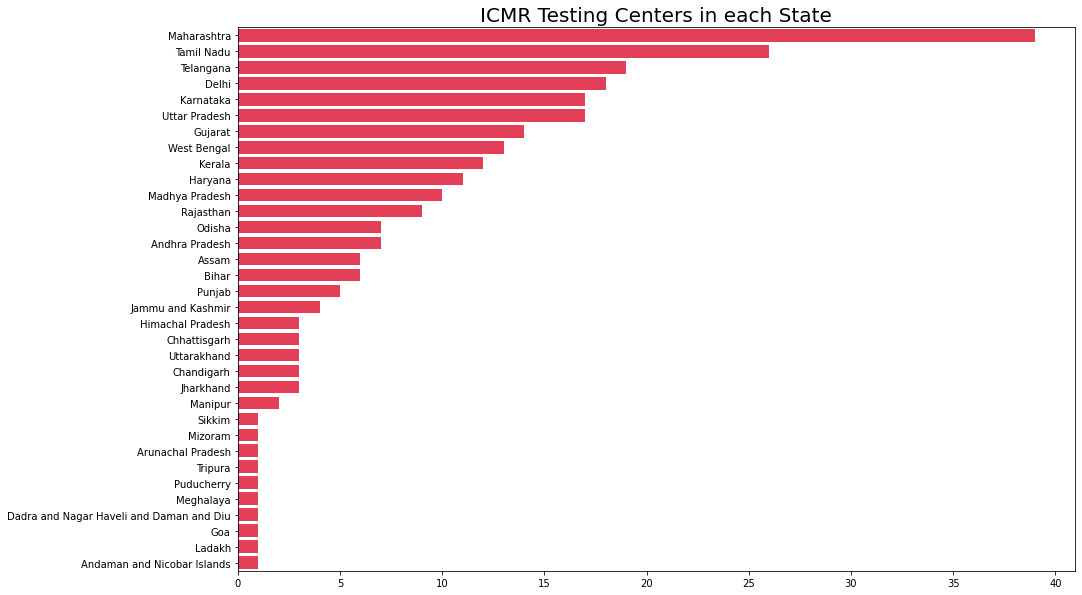

In [114]:
#Number of ICMR Testing Centres in each state
values = list(ICMR_labs['state'].value_counts())
names = list(ICMR_labs['state'].value_counts().index)

plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
plt.title('ICMR Testing Centers in each State', fontsize = 20)
sns.barplot(x= values, y= names,color = '#ff2345');

#Let's Start with the predictions


Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Why Prophet?
Accurate and fast: Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in Stan so that you get forecasts in just a few seconds.

Fully automatic: Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

Tunable forecasts: The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge

Available in R or Python: Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you’re comfortable with to get forecasts.

In [115]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [116]:
!pip install Prophet

     |████████████████████████████████| 92kB 2.6MB/s 
  Created wheel for Prophet: filename=prophet-0.1.1.post1-cp36-none-any.whl size=13236 sha256=26879cc2e8c3631e0a424c512ab761a7875848370fab977423977a7b7d761712
  Stored in directory: /root/.cache/pip/wheels/71/d7/4f/0ade9b5843362f84d39c21edbe6065032e388053c4ab0ab83e
Successfully built Prophet


In [125]:
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [126]:
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [127]:
# save data in a dataframe
th = pd.DataFrame(parsed['states_tested_data'])

# first few rows
th

,coronaenquirycalls,cumulativepeopleinquarantine,negative,numcallsstatehelpline,numicubeds,numisolationbeds,numventilators,peopleinicu,peopleonventilators,populationncp2019projection,positive,source1,source2,state,tagpeopleinquarantine,tagtotaltested,testpositivityrate,testspermillion,testsperpositivecase,testsperthousand,totaln95masks,totalpeoplecurrentlyinquarantine,totalpeoplereleasedfromquarantine,totalppe,totaltested,unconfirmed,updatedon,_d5fpr
0,,,1210,,,50,,,,397000,12,https://t.me/indiacovid/2550,,Andaman and Nicobar Islands,,Samples Sent,0.86%,3534,117,3.53,,,,,1403,181,17/04/2020,NaN
1,,,,280,,50,,,,397000,27,https://t.me/indiacovid/3147?single,,Andaman and Nicobar Islands,Institutional,Samples Sent,1.01%,6748,99,6.75,,614,347,,2679,246,24/04/2020,NaN
2,,,,298,,50,,,,397000,33,https://t.me/indiacovid/3365?single,,Andaman and Nicobar Islands,Institutional,Samples Sent,1.16%,7174,86,7.17,,724,420,,2848,106,27/04/2020,NaN
3,,,,340,,50,,,,397000,33,https://t.me/indiacovid/3781,,Andaman and Nicobar Islands,Institutional,Samples Sent,0.88%,9456,114,9.46,,643,556,,3754,199,01/05/2020,NaN
4,,,,471,,98,,,,397000,33,https://t.me/indiacovid/4925,,Andaman and Nicobar Islands,Institutional,Samples Sent,0.49%,16819,202,16.82,,16,1196,,6677,136,16/05/2020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,,,,,948,,395,,,96906000,15648,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.56%,4533,28,4.53,946040,7865,93180,1569262,439258,,25/06/2020,NaN
2567,,,,,948,,395,,,96906000,16190,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.61%,4631,28,4.63,956040,7330,93898,1582262,448795,,26/06/2020,NaN
2568,,,,,948,,395,,,96906000,16711,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.65%,4730,27,4.73,966040,7181,94993,1596262,458343,,27/06/2020,NaN
2569,,,,,948,,395,,,96906000,17283,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.69%,4839,27,4.84,976040,6937,95383,1606262,468906,,28/06/2020,NaN


In [128]:
th.columns

Index(['coronaenquirycalls', 'cumulativepeopleinquarantine', 'negative',
       'numcallsstatehelpline', 'numicubeds', 'numisolationbeds',
       'numventilators', 'peopleinicu', 'peopleonventilators',
       'populationncp2019projection', 'positive', 'source1', 'source2',
       'state', 'tagpeopleinquarantine', 'tagtotaltested',
       'testpositivityrate', 'testspermillion', 'testsperpositivecase',
       'testsperthousand', 'totaln95masks', 'totalpeoplecurrentlyinquarantine',
       'totalpeoplereleasedfromquarantine', 'totalppe', 'totaltested',
       'unconfirmed', 'updatedon', '_d5fpr'],
      dtype='object')

In [129]:
# save to csv`
th.to_csv('tests_latest_state_level.csv', index=False)

In [131]:
# to get web contents
import requests
# to parse json contents
import json
# to parse csv files
import csv